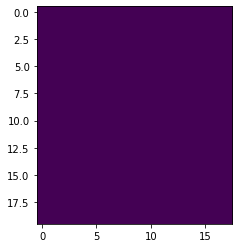

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
home_directory = os.environ['HOME']
data_folder = home_directory + "/Data/spectrometer/LS_scan/Spectrometer_Readings_01312022"


file = data_folder +"/Data_Map.xlsx"

df = pd.read_excel(file,engine="openpyxl")
scan_map_index = np.array(df,)
data_map = np.zeros(np.shape(scan_map_index))
data_std_map = np.zeros(np.shape(scan_map_index))
# print(scan_map_index)
# print(data_map)


ind = np.where(scan_map_index ==5)
# data_map[ind] = 1
# print(data_map)

plt.imshow(data_map)
plt.show()



In [16]:
print(np.where(scan_map_index ==np.nan))

ind = np.where(scan_map_index ==5)
scan_map_index[ind]

(array([], dtype=int64), array([], dtype=int64))


array([5.])

In [17]:
import glob


data_files = sorted(glob.glob(data_folder+"/Light/*"),reverse=True)
str_set = set()
for f in data_files:
    str_set.add(int(f.split('/')[-1].split('_')[0]))
indexes = sorted(str_set)

light_data_dict = {}
dark_data_dict = {}
for i in sorted(str_set):
    number_str = str(i)
    one_exp_files = sorted(glob.glob(data_folder+"/Light/" + number_str+ "_*"))
    one_exp_dark_files = sorted(glob.glob(data_folder+"/Dark/" + number_str+ "_*"))
    light_data_dict[i] = one_exp_files
    dark_data_dict[i] = one_exp_dark_files
    
    
print(light_data_dict[1])
print(dark_data_dict[1])
#     print(one_exp_files)

['/home/ciber2/Data/spectrometer/LS_scan/Spectrometer_Readings_01312022/Light/1_FLMS143431_09-57-17-611.txt', '/home/ciber2/Data/spectrometer/LS_scan/Spectrometer_Readings_01312022/Light/1_FLMS143431_09-57-27-611.txt', '/home/ciber2/Data/spectrometer/LS_scan/Spectrometer_Readings_01312022/Light/1_FLMS143431_09-57-37-610.txt']
['/home/ciber2/Data/spectrometer/LS_scan/Spectrometer_Readings_01312022/Dark/1_FLMS143431_09-58-47-608.txt']


Text(0, 0.5, 'count')

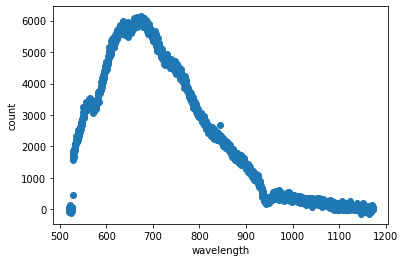

In [19]:
import matplotlib.pyplot as plt
from spec_reader import spec_reader

_,wave,count =spec_reader.read_data_set(light_data_dict[1])
_,wave,count_bg =spec_reader.read_data_set(dark_data_dict[1])
fig,ax = plt.subplots()
ax.scatter(wave,count-count_bg)
ax.set_xlabel("wavelength")
ax.set_ylabel("count")

In [30]:
import numpy as np
for i in sorted(str_set):
#     print(i)
    _,waves,count_light =spec_reader.read_data_set(light_data_dict[i])
    _,_,count_dark =spec_reader.read_data_set(dark_data_dict[i])
    peak_cut_data = (count_light-count_dark)[500:550]
    ind = np.where(scan_map_index ==i)
    data_map[ind] = np.nanmean(peak_cut_data)
    data_std_map[ind] = np.std(peak_cut_data)
# plt.imshow(data_map)
# plt.show()                        
#     print(np.nanmean(peak_cut_data)


Text(0.5, 1.0, 'count map')

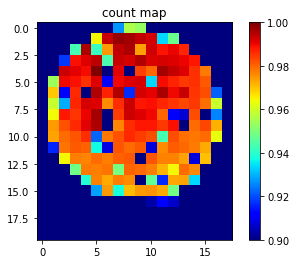

In [41]:
fig,ax = plt.subplots()
im = ax.imshow(data_map/np.max(data_map),vmin=0.90,cmap='jet')
fig.colorbar(im, ax=ax)
ax.set_title("count map")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5, 1.0, 'std map')

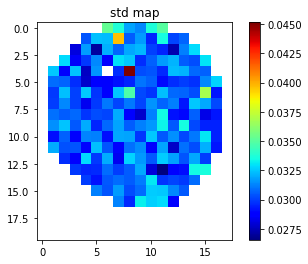

In [38]:
fig,ax = plt.subplots()
im = ax.imshow(data_std_map/data_map,cmap='jet')
fig.colorbar(im, ax=ax)
ax.set_title("std map")


Text(0, 0.5, 'transparent')

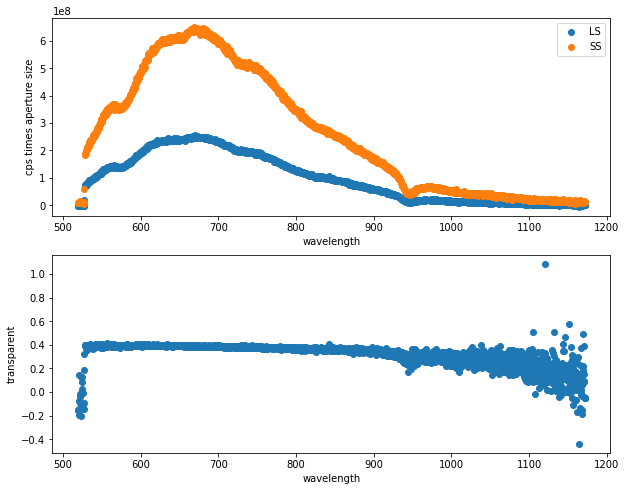

In [100]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from spec_reader import spec_reader
import importlib
importlib.reload(spec_reader)
import math

"""
for LS out put
"""
home_directory = os.environ['HOME']
data_folder = home_directory + "/Data/spectrometer/LS_scan/Spectrometer_Readings_01312022"
data_files = sorted(glob.glob(data_folder+"/Light/*"),reverse=True)
str_set = set()
for f in data_files:
    str_set.add(int(f.split('/')[-1].split('_')[0]))
indexes = sorted(str_set)

light_data_dict = {}
dark_data_dict = {}
for i in sorted(str_set):
    number_str = str(i)
    one_exp_files = sorted(glob.glob(data_folder+"/Light/" + number_str+ "_*"))
    one_exp_dark_files = sorted(glob.glob(data_folder+"/Dark/" + number_str+ "_*"))
    light_data_dict[i] = one_exp_files
    dark_data_dict[i] = one_exp_dark_files

wave,measured_cps_LS = spec_reader.get_cps_2(light_data_dict[110],dark_data_dict[110])

fig,axs = plt.subplots(2,)
fig.set_size_inches(10,8)

ax = axs[0]
measured_cps_times_aperture_LS = measured_cps_LS*(330**2*math.pi)
ax.scatter(wave,measured_cps_times_aperture_LS,label="LS")
    
    
home_directory = os.environ['HOME']
data_folder = home_directory + "/Data/spectrometer/LS_scan/Small_Sphere_Readings_02062022"

light_data_SS = sorted(glob.glob(data_folder+"/Light/*"),reverse=True)
dark_data_SS = sorted(glob.glob(data_folder+"/Dark/*"),reverse=True)

wave,measured_cps_SS =  spec_reader.get_cps_2(light_data_SS,dark_data_SS)
measured_cps_times_aperture_SS = measured_cps_SS*(25.4**2*math.pi) 

ax.scatter(wave,measured_cps_times_aperture_SS,label="SS")
ax.set_xlabel("wavelength")
ax.set_ylabel("cps times aperture size")
ax.legend()

ax2 = axs[1]
transparent = measured_cps_times_aperture_LS/measured_cps_times_aperture_SS
ax2.scatter(wave,transparent)

ax2.set_xlabel("wavelength")
ax2.set_ylabel("transparent")
